Dataset downloaded to: /kaggle/input/housing-price-prediction

First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Model 

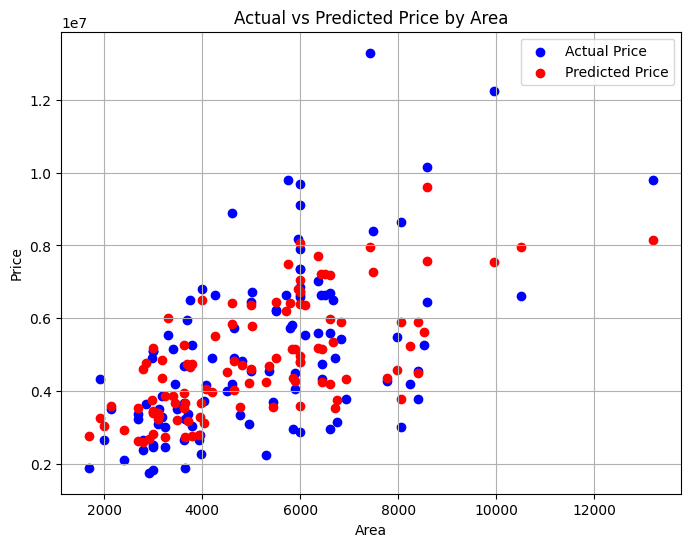


Model Coefficients:
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [1]:
# ===============================
# Task 3: Linear Regression
# ===============================

# Step 1: Install Required Libraries
!pip install kagglehub --quiet
!pip install scikit-learn pandas matplotlib seaborn --quiet

# Step 2: Import Libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 3: Load Dataset from KaggleHub
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")
print("Dataset downloaded to:", path)

# Load the dataset CSV
df = pd.read_csv(path + "/Housing.csv")

# Step 4: Preprocess Data
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop("price", axis=1)
y = df["price"]

# Step 5: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 8: Visualize Results (for a single feature, say "area")
plt.figure(figsize=(8,6))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price by Area')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Coefficients Interpretation
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coeff_df)
